# Pairs trading. Introduction.

Let's say that we have two stocks: A and B. Their prices depend on a common factor F plus some noise. Assume that F follows a random walk process. We have:

\begin{equation}
P_{a,t} = F_t + w_{a,t}, \quad w_a \sim \mathcal{N(0,1)} \\
P_{b,t} = F_t + w_{b,t}, \quad w_b \sim \mathcal{N(0,1)}
\end{equation}

First we generate stocks price time series.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate random walk process
np.random.seed(112)
F = [50]
for i in range(252):
    F.append(F[i] + np.random.randn())
F = np.array(F)

# generate price series
P_a = F + np.random.randn(len(F))
P_b = F + np.random.randn(len(F))

Now let's plot the prices that we generated.

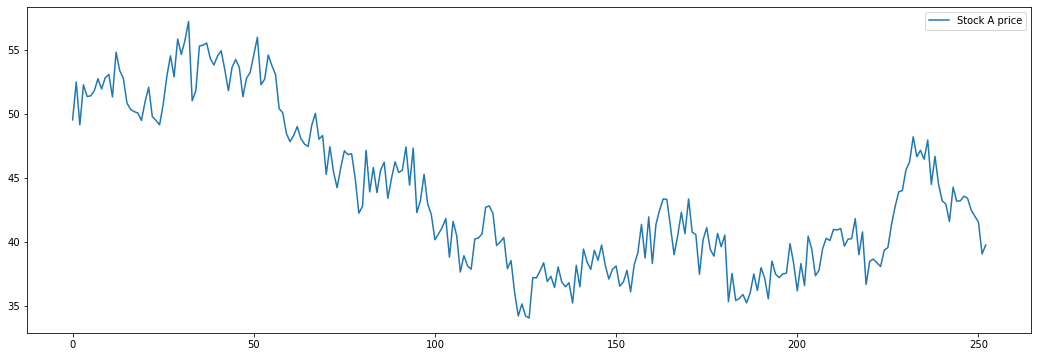

In [2]:
plt.figure(figsize=(18,6))
plt.plot(P_a, label='Stock A price')
plt.legend()

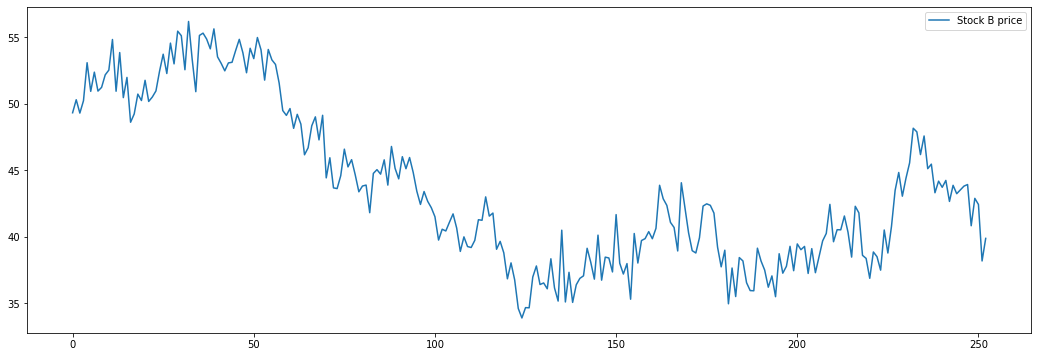

In [3]:
plt.figure(figsize=(18,6))
plt.plot(P_b, label='Stock B price')
plt.legend()

If we consider price series of two stocks separately, they look like a random walk (which they are) and we don't see any obvious way to predict their future movements. Let's plot both series together.

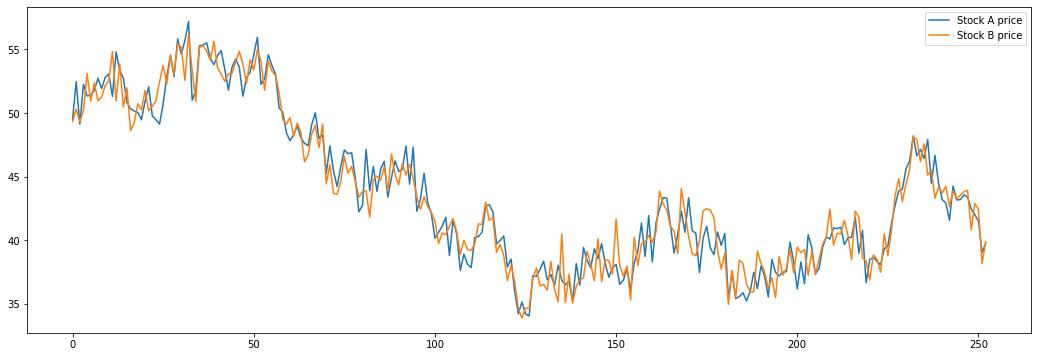

In [4]:
plt.figure(figsize=(18,6))
plt.plot(P_a, label='Stock A price')
plt.plot(P_b, label='Stock B price')
plt.legend()

Here we can notice that prices tend to move together. How can we use this? Assume that we create a portfolio by taking a long position in stock A and a short position in stock B. What will the portfolio price look like?

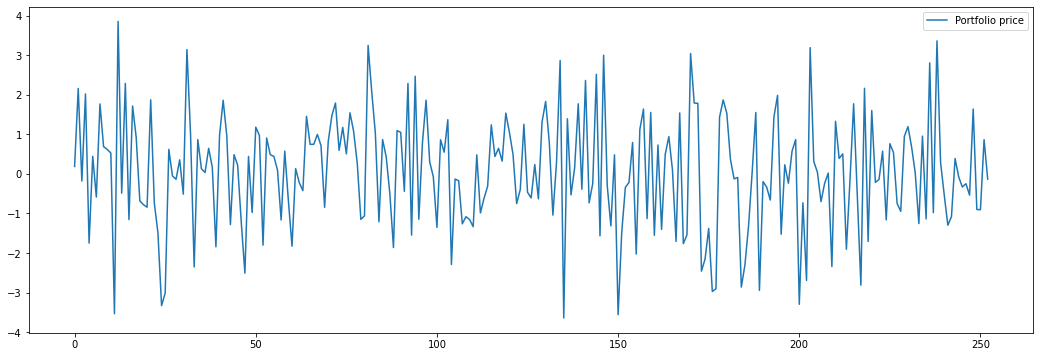

In [5]:
portfolio = P_a - P_b
plt.figure(figsize=(18,6))
plt.plot(portfolio, label='Portfolio price')
plt.legend()

We can see that the resulting time series demonstrate mean reverting behavior. Portfolio price oscillates around zero. Basically by creating such portfolio we were able to cancel the random walk component of individual stock price series and now we are left only with the white noise components. 

If we observe that portfolio price is lower\higher than zero, we expect it to return back to zero. Assume that we open a position when the portfolio price deviates from its mean by more than 2 historical standard deviations: 
- open long position when portfolio price is more than 2 standard deviations below the mean
- close long position when portfolio price crosses the mean from below
- open short position when portfolio price is more than 2 standard deviations above the mean
- close short position when portfolio price crosses the mean from above

Below is the plot of portfolio price with 2-SD bands and positions that we should take (+1: long position, -1: short position, 0: no position)

Text(0.5, 1.0, 'Positions')

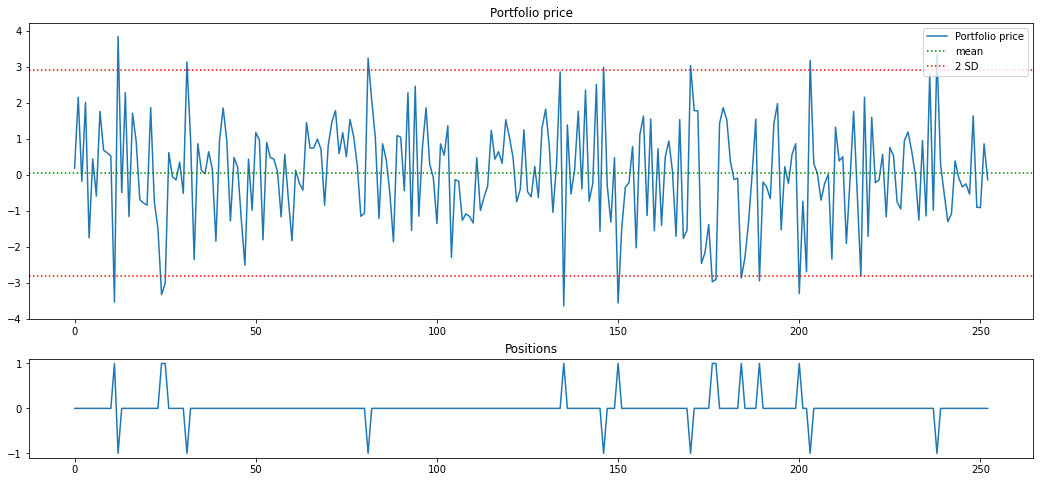

In [6]:
# calculate portfolio mean and standard deviation
mu = np.mean(portfolio)
sigma = np.std(portfolio)

# calculate positions
positions = np.zeros(portfolio.shape)
positions[portfolio > mu+2*sigma] = -1 # short position
positions[portfolio < mu-2*sigma] = 1 # long position

# plot portfolio price and positions
f, (a1, a2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
f.set_figwidth(18)
f.set_figheight(8)
a1.plot(portfolio, label='Portfolio price')
a1.set_title('Portfolio price')
a1.axhline(y=mu, color='g', linestyle='dotted', label='mean')
a1.axhline(y=mu+2*sigma, color='r', linestyle='dotted', label='2 SD')
a1.axhline(y=mu-2*sigma, color='r', linestyle='dotted')
a1.legend(loc='upper right')
a2.plot(positions)
a2.set_title('Positions')

In [7]:
# approximate profit
profit = 15*2*sigma # 15 trading opportunities, approx. 2*sigma profir per trade
print(profit)

42.97375646632189


There are 15 trading opportunities displayed on the plot above. If we were to trade a portfolio consisting of one stock A and one stock B, then we could earn approximately \\$43 profit (\\$2.87 per trade). If we traded a portfolio consisting of 100 stocks A and 100 stocks B, then our gains and losses should be multiplied by 100, giving a profit of \\$4300.

This synthetic example demonstrates the general principle of pairs trading. Of course in real life it is a lot more complicated. In the following articles I will describe several methods of pair selection and apply them to real world data.